In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import csv

#-----------------------------------------------------------------------------


class CsvDATA: # csv 파일 로드 
    def __init__(self,fname):
        self.lists=[]
        file=open(fname,encoding='cp949') # 변수명=open(파일 경로,encoding 작업)
        getline = csv.reader(file)
        line_count=0
        for i in getline:
            if line_count>5:
                self.lists.append(i)
            line_count+=1
        file.close()

    def Counts_Genre(self,list_input,genre_list):
        count_list=[]
        for genre in genre_list:
            count_list.append(0) # Genre_list의 요소 수 만큼 카운트 리스트를 생성하고 각 값을 0으로 준다 
    
        for i in list_input:
            for idx,name_input in enumerate(genre_list): #enumerate 를 이용하여 요소 인덱스 값에 접근 
                if name_input in i[11]:
                    count_list[idx]+=1 #위에서 생성한 카운트리스트의 인덱스 요소마다 카운트 상승 
        return count_list
    
    def GetYearList(self,years_list):
        Data_list_years=[]
        for year in years_list:
            Data_list_years.append([]) # years_list에 입력된 리스트를 적용 ([])

        datas=self.lists.copy() # CSVDATA에서 불러온 원본데이터 복사 
        for data in datas: 
            for idx,year in enumerate(years_list): 
                if year in data[2]:
                    Data_list_years[idx].append(data) 
        return Data_list_years
    
    def Count_audience(self,list_input,genre_list):
        audience_list=[]
        for audience in genre_list:
            audience_list.append(0)
    
        for i in list_input:
            for idx,name_input in enumerate(genre_list):
                if name_input in i[11]:
                    i[5]=i[5].replace(',','')
                    audience_list[idx]+=int(i[5])*0.0001
        
        return audience_list

    
dataA3 = CsvDATA('Data_List_A3.csv')
years_list=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
Genre_List=['액션','드라마','코미디','어린이','스릴러','판타지','SF','모험','뮤지컬','전쟁']
get_years_data=dataA3.GetYearList(years_list)

AudienceCount_list=[]  # 2011~2020 data 리스트
Graph_AudienceCount_list=[[],[],[],[],[],[],[],[],[],[]] # 그래프용 장르 카운트 리스트
for i in range(10):
    AudienceCount_list.append(dataA3.Count_audience(get_years_data[i],Genre_List))

for i in range(10): # 그래프용 장르 카운트 리스트 축 뒤집기 
    for j in range(10):
        Graph_AudienceCount_list[i].append(AudienceCount_list[j][i])

GenreCount_list=[]
for i in range(10):
    GenreCount_list.append(dataA3.Counts_Genre(get_years_data[i],Genre_List))

Graph_GenreCount_list=[]
for i in range(10):
    Graph_GenreCount_list.append(dataA3.Counts_Genre(get_years_data[i],Genre_List))

Graph1_list=dict(zip(years_list,Graph_GenreCount_list)) # 그래프 1용 results 값 
Graph2_list=dict(zip(Genre_List,Graph_AudienceCount_list)) # 그래프 2용 값



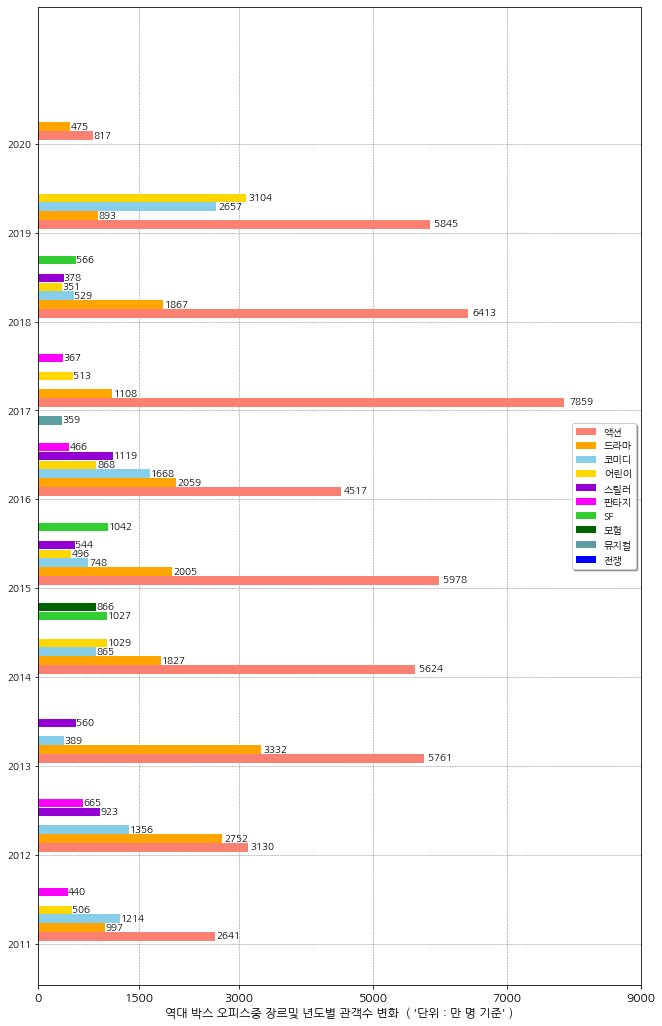

In [101]:
# plt.rcParams["font.family"] = 'NanumGothic'
# plt.rcParams["font.size"] = 10
# plt.rcParams["figure.figsize"] = (14,4)


def main():
    #### 1. bar plot으로 나타낼 데이터 입력
    models = Genre_List
    yticks = years_list
    data = Graph2_list

    #### 2. matplotlib의 figure 및 axis 설정
    fig, ax = plt.subplots(1,1,figsize=(12,18)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
    colors = ['salmon','orange','skyblue','gold','darkviolet','fuchsia',\
              'limegreen','darkgreen','cadetblue','blue','']
    height = 0.1
# hotpink ,  fuchsia,   limegreen   darkgreen  orange   cadetblue  yellow   skyblue
#'salmon', 'orange', 'cadetblue', 'skyblue'

    #### 3. bar 그리기
    for i, model in enumerate(models):
        pos = compute_pos(yticks, height, i, models)
        bar = ax.barh(pos, data[model], height=height*0.95, label=model, color=colors[i])
        present_width(ax, bar) # bar너비 출력

    #### 4. x축 세부설정
    ax.set_xlim([0,9000])
    ax.set_xticks([0, 1500, 3000, 5000, 7000, 9000])
    #plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d 만'))
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_xlabel("역대 박스 오피스중 장르및 년도별 관객수 변화  ( '단위 : 만 명 기준' )", fontsize=12)
    
    #### 5. y축 세부설정
    ax.set_yticks(range(len(yticks))) # 메인 ytick len 크기 만큼 
    ax.set_yticklabels(yticks, fontsize=10)
    #ax.set_ylabel('Years', fontsize=14)

    #### 6. 범례 나타내기
    box = ax.get_position() # 범례를 그래프상자 밖에 그리기위해 상자크기를 조절
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax.legend(loc='center right', bbox_to_anchor=(1,0.5), shadow=True, ncol=1)

    #### 7. 보조선(눈금선) 나타내기
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

#     #### 8. 그래프 저장하고 출력하기
#     plt.savefig('ex_barhplot.png', format='png', dpi=300)
#     plt.show()

def present_width(ax, bar):
    for rect in bar:
        width = rect.get_width()
        if width<1:
            continue
        posx = width*1.01
        posy = rect.get_y()+rect.get_height()*0.5
        ax.text(posx, posy, '%d' % width, rotation=0, ha='left', va='center')
    
    
def compute_pos(yticks, height, i, models):
    index = np.arange(len(yticks))
    n = len(models)
    correction = i +0.1*(n-1)
    return index + height * correction

main()